In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [2]:
#데이터 불러오기
train = pd.read_csv("C:/Users/KU_BD_3/김동우데이터 모음/train.csv")
test = pd.read_csv("C:/Users/KU_BD_3/김동우데이터 모음/test.csv")
train_1 = pd.read_csv("C:/Users/KU_BD_3/김동우데이터 모음/train.csv")
sample_submission = pd.read_csv("C:/Users/KU_BD_3/김동우데이터 모음/sample_submission.csv")

In [3]:
pd.concat([train,test],axis = 0)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,F,Y,Y,0,202500.0,Working,Incomplete higher,Married,House / apartment,-18593,-5434,1,1,1,0,Accountants,2.0,-19.0,NaN
9996,36453,M,Y,Y,0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886,-1315,1,1,0,0,Laborers,2.0,-34.0,NaN
9997,36454,F,N,Y,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,-21016,-14018,1,0,0,0,Medicine staff,2.0,-55.0,NaN
9998,36455,F,Y,N,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-16541,-1085,1,0,1,0,NaN,2.0,-33.0,NaN


In [4]:
data = pd.concat([train,test],axis = 0)

In [5]:
data.isnull()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True


In [6]:
data.isnull().sum()

index                0
gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
occyp_type       11323
family_size          0
begin_month          0
credit           10000
dtype: int64

In [7]:
data = data.drop("occyp_type",axis = 1)

In [8]:
data.isnull().sum()

index                0
gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
family_size          0
begin_month          0
credit           10000
dtype: int64

In [9]:
len(data['gender'].unique())

2

In [10]:
unique_len = data.apply(lambda x: len(x.unique()))

In [11]:
unique_len

index            36457
gender               2
car                  2
reality              2
child_num            9
income_total       265
income_type          5
edu_type             5
family_type          5
house_type           6
DAYS_BIRTH        7183
DAYS_EMPLOYED     3640
FLAG_MOBIL           1
work_phone           2
phone                2
email                2
family_size         10
begin_month         61
credit               4
dtype: int64

-1.2개 이하\
-2.2개 초과 10개 이하\
-3.10개 초과

In [12]:
group1 = unique_len[unique_len <=2].index
group1

Index(['gender', 'car', 'reality', 'FLAG_MOBIL', 'work_phone', 'phone',
       'email'],
      dtype='object')

In [13]:
group2 = unique_len[(unique_len > 2)&(unique_len <= 10)].index
group2

Index(['child_num', 'income_type', 'edu_type', 'family_type', 'house_type',
       'family_size', 'credit'],
      dtype='object')

In [14]:
group3 = unique_len[(unique_len > 10)].index
group3

Index(['index', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month'], dtype='object')

# data group1 (이진 변수)데이터 가공

In [15]:
data['gender'].unique()

array(['F', 'M'], dtype=object)

In [16]:
data['gender'] = data['gender'].replace(['F','M'],[0,1])

data['car'] = data['car'].replace(['N','Y'],[0,1])

data['reality'] = data['reality'].replace(['N','Y'],[0,1])


In [17]:
data[group1]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
0,0,0,0,1,0,0,0
1,0,0,1,1,0,0,1
2,1,1,1,1,0,1,0
3,0,0,1,1,0,1,0
4,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...
9995,0,1,1,1,1,1,0
9996,1,1,1,1,1,0,0
9997,0,0,1,1,0,0,0
9998,0,1,0,1,0,1,0


# data group2 데이터 가공

<AxesSubplot:>

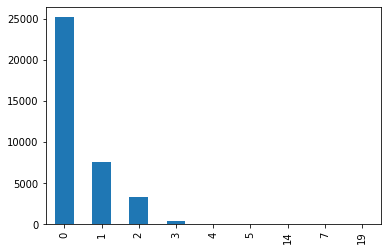

In [18]:
data['child_num'].value_counts().plot.bar()

In [19]:
data.loc[data['child_num']>2,'child_num'] = 2 

<AxesSubplot:>

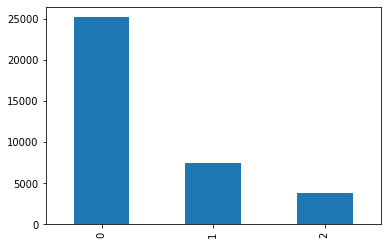

In [20]:
data['child_num'].value_counts().plot.bar()

# 카테고리형 변수 처리

In [21]:
data[group2]

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,Commercial associate,Higher education,Married,Municipal apartment,2.0,1.0
1,1,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,3.0,1.0
2,0,Working,Higher education,Married,House / apartment,2.0,2.0
3,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,0.0
4,0,State servant,Higher education,Married,House / apartment,2.0,2.0
...,...,...,...,...,...,...,...
9995,0,Working,Incomplete higher,Married,House / apartment,2.0,NaN
9996,0,Working,Secondary / secondary special,Civil marriage,House / apartment,2.0,NaN
9997,0,Working,Secondary / secondary special,Married,House / apartment,2.0,NaN
9998,0,Commercial associate,Secondary / secondary special,Married,House / apartment,2.0,NaN


In [22]:
data[group2].apply(lambda x :len(x.unique()))

child_num       3
income_type     5
edu_type        5
family_type     5
house_type      6
family_size    10
credit          4
dtype: int64

In [23]:
from sklearn import preprocessing

In [24]:
label_encoder = preprocessing.LabelEncoder()

In [25]:
data['income_type'].unique()

array(['Commercial associate', 'Working', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [26]:
label_encoder.fit_transform(data['income_type'])

array([0, 0, 4, ..., 4, 0, 4])

In [27]:
set(label_encoder.fit_transform(data['income_type']))

{0, 1, 2, 3, 4}

In [28]:
data['income_type'] = label_encoder.fit_transform(data['income_type'])
data['edu_type'] = label_encoder.fit_transform(data['edu_type'])
data['family_type'] = label_encoder.fit_transform(data['family_type'])
data['house_type'] = label_encoder.fit_transform(data['house_type'])

In [29]:
data[group2]

,child_num,income_type,edu_type,family_type,house_type,family_size,credit
0,0,0,1,1,2,2.0,1.0
1,1,0,4,0,1,3.0,1.0
2,0,4,1,1,1,2.0,2.0
3,0,0,4,1,1,2.0,0.0
4,0,2,1,1,1,2.0,2.0
...,...,...,...,...,...,...,...
9995,0,4,2,1,1,2.0,NaN
9996,0,4,4,0,1,2.0,NaN
9997,0,4,4,1,1,2.0,NaN
9998,0,0,4,1,1,2.0,NaN


# 연속형변수 구간화

In [30]:
data[group3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,202500.0,-13899,-4709,-6.0
1,1,247500.0,-11380,-1540,-5.0
2,2,450000.0,-19087,-4434,-22.0
3,3,202500.0,-15088,-2092,-37.0
4,4,157500.0,-15037,-2105,-26.0
...,...,...,...,...,...
9995,36452,202500.0,-18593,-5434,-19.0
9996,36453,202500.0,-10886,-1315,-34.0
9997,36454,292500.0,-21016,-14018,-55.0
9998,36455,180000.0,-16541,-1085,-33.0


In [31]:
data['income_total'].min()

27000.0

In [32]:
data['income_total'].max()

1575000.0

In [33]:
len(data['income_total'].unique())

265

In [34]:
counts, bin_dividers = np.histogram(data['income_total'],bins = 7)

In [35]:
data['income_total']

0       202500.0
1       247500.0
2       450000.0
3       202500.0
4       157500.0
          ...   
9995    202500.0
9996    202500.0
9997    292500.0
9998    180000.0
9999    270000.0
Name: income_total, Length: 36457, dtype: float64

### 연속형 변수를 그룹화

In [36]:
pd.cut(data['income_total'], bins = bin_dividers, include_lowest = True)

0        (26999.999, 248142.857]
1        (26999.999, 248142.857]
2       (248142.857, 469285.714]
3        (26999.999, 248142.857]
4        (26999.999, 248142.857]
                  ...           
9995     (26999.999, 248142.857]
9996     (26999.999, 248142.857]
9997    (248142.857, 469285.714]
9998     (26999.999, 248142.857]
9999    (248142.857, 469285.714]
Name: income_total, Length: 36457, dtype: category
Categories (7, interval[float64]): [(26999.999, 248142.857] < (248142.857, 469285.714] < (469285.714, 690428.571] < (690428.571, 911571.429] < (911571.429, 1132714.286] < (1132714.286, 1353857.143] < (1353857.143, 1575000.0]]

In [37]:
pd.cut(data['income_total'], bins = bin_dividers, include_lowest = True,labels = [i for i in range(7)])

0       0
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: income_total, Length: 36457, dtype: category
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]

In [38]:
data['income_total'] = pd.factorize(pd.cut(data['income_total'], bins = bin_dividers, include_lowest = True,labels = [i for i in range(7)]))[0]

In [39]:
data[group3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,0,-13899,-4709,-6.0
1,1,0,-11380,-1540,-5.0
2,2,1,-19087,-4434,-22.0
3,3,0,-15088,-2092,-37.0
4,4,0,-15037,-2105,-26.0
...,...,...,...,...,...
9995,36452,0,-18593,-5434,-19.0
9996,36453,0,-10886,-1315,-34.0
9997,36454,1,-21016,-14018,-55.0
9998,36455,0,-16541,-1085,-33.0


In [40]:
def make_bin(array,n):
    array = -array
    _, bin_dividers = np.histogram(array,bins = n)
    cut_categories = pd.cut(array, bins = bin_dividers, include_lowest = True,labels = [i for i in range(n)])
    bined_array = pd.factorize(cut_categories)[0]
    return bined_array

In [41]:
pd.Series(make_bin(data['DAYS_BIRTH'],10)).value_counts()
#그룹화한 데이터 개수 찾기

0    5177
3    5015
1    4922
5    4248
4    4063
2    3934
8    3713
6    3252
9    1252
7     881
dtype: int64

In [42]:
data['DAYS_BIRTH'] = make_bin(data['DAYS_BIRTH'],10)
data['DAYS_EMPLOYED'] = make_bin(data['DAYS_EMPLOYED'],6)
data['begin_month'] = make_bin(data['begin_month'],4)

In [43]:
data[group3]

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0,0,0,0,0
1,1,0,1,0,0
2,2,1,2,0,1
3,3,0,3,0,2
4,4,0,3,0,1
...,...,...,...,...,...
9995,36452,0,2,0,1
9996,36453,0,5,0,2
9997,36454,1,8,0,3
9998,36455,0,4,0,2


In [44]:
data

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,0,0,0,1,1,2,0,0,1,0,0,0,2.0,0,1.0
1,1,0,0,1,1,0,0,4,0,1,1,0,1,0,0,1,3.0,0,1.0
2,2,1,1,1,0,1,4,1,1,1,2,0,1,0,1,0,2.0,1,2.0
3,3,0,0,1,0,0,0,4,1,1,3,0,1,0,1,0,2.0,2,0.0
4,4,0,1,1,0,0,2,1,1,1,3,0,1,0,0,0,2.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,0,4,2,1,1,2,0,1,1,1,0,2.0,1,NaN
9996,36453,1,1,1,0,0,4,4,0,1,5,0,1,1,0,0,2.0,2,NaN
9997,36454,0,0,1,0,1,4,4,1,1,8,0,1,0,0,0,2.0,3,NaN
9998,36455,0,1,0,0,0,0,4,1,1,4,0,1,0,1,0,2.0,2,NaN


# 모델 돌려보기

In [45]:
train.shape

(26457, 20)

In [46]:
test.shape

(10000, 19)

In [47]:
data[:-10000]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,0,0,0,1,1,2,0,0,1,0,0,0,2.0,0,1.0
1,1,0,0,1,1,0,0,4,0,1,1,0,1,0,0,1,3.0,0,1.0
2,2,1,1,1,0,1,4,1,1,1,2,0,1,0,1,0,2.0,1,2.0
3,3,0,0,1,0,0,0,4,1,1,3,0,1,0,1,0,2.0,2,0.0
4,4,0,1,1,0,0,2,1,1,1,3,0,1,0,0,0,2.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,0,2,4,1,1,1,0,1,0,0,0,4.0,0,1.0
26453,26453,0,0,1,1,0,4,1,2,1,3,0,1,0,0,0,2.0,3,2.0
26454,26454,0,1,0,0,1,4,4,0,5,5,0,1,0,0,0,2.0,1,2.0
26455,26455,1,0,1,0,0,4,2,3,1,5,0,1,0,0,0,1.0,3,2.0


In [48]:
train = data[:-10000]
test = data[-10000:]

In [49]:
train_x = train.drop("credit",axis = 1)

In [50]:
train_y = train['credit']
test_x = test.drop("credit",axis = 1)

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
clf = RandomForestClassifier()

In [53]:
clf.fit(train_x,train_y)

RandomForestClassifier()

In [54]:
train_proba = clf.predict_proba(train_x)

In [55]:
train_proba

array([[0.08, 0.72, 0.2 ],
       [0.05, 0.83, 0.12],
       [0.09, 0.08, 0.83],
       ...,
       [0.06, 0.18, 0.76],
       [0.02, 0.17, 0.81],
       [0.02, 0.09, 0.89]])

In [56]:
np.argmax(train_proba,axis = 1)[:10]

array([1, 1, 2, 0, 2, 1, 2, 0, 2, 2], dtype=int64)

In [57]:
clf.predict_proba(test_x)

array([[0.04, 0.36, 0.6 ],
       [0.08, 0.35, 0.57],
       [0.05, 0.24, 0.71],
       ...,
       [0.03, 0.2 , 0.77],
       [0.08, 0.46, 0.46],
       [0.12, 0.27, 0.61]])

In [58]:
sample_submission.iloc[:,1:] = clf.predict_proba(test_x)

In [59]:
sample_submission

,index,0,1,2
0,26457,0.04,0.36,0.60
1,26458,0.08,0.35,0.57
2,26459,0.05,0.24,0.71
3,26460,0.11,0.27,0.62
4,26461,0.09,0.34,0.57
...,...,...,...,...
9995,36452,0.10,0.42,0.48
9996,36453,0.17,0.36,0.47
9997,36454,0.03,0.20,0.77
9998,36455,0.08,0.46,0.46


In [60]:
sample_submission.to_csv("sample_submission_ver1.csv",index = False)

# Catbbost Classifier

In [61]:
from catboost import CatBoostClassifier

In [62]:
CatBoostClassifier = CatBoostClassifier()

In [63]:
CatBoostClassifier.fit(train_x,train_y)

Learning rate set to 0.093513
0:	learn: 1.0556391	total: 182ms	remaining: 3m 1s
1:	learn: 1.0216984	total: 189ms	remaining: 1m 34s
2:	learn: 0.9944126	total: 194ms	remaining: 1m 4s
3:	learn: 0.9719923	total: 200ms	remaining: 49.8s
4:	learn: 0.9535839	total: 205ms	remaining: 40.9s
5:	learn: 0.9385596	total: 210ms	remaining: 34.9s
6:	learn: 0.9260930	total: 215ms	remaining: 30.5s
7:	learn: 0.9156105	total: 220ms	remaining: 27.2s
8:	learn: 0.9071262	total: 224ms	remaining: 24.7s
9:	learn: 0.8997507	total: 238ms	remaining: 23.5s
10:	learn: 0.8934929	total: 243ms	remaining: 21.9s
11:	learn: 0.8883338	total: 249ms	remaining: 20.5s
12:	learn: 0.8839024	total: 253ms	remaining: 19.2s
13:	learn: 0.8802503	total: 258ms	remaining: 18.2s
14:	learn: 0.8768974	total: 263ms	remaining: 17.3s
15:	learn: 0.8741781	total: 269ms	remaining: 16.5s
16:	learn: 0.8721432	total: 273ms	remaining: 15.8s
17:	learn: 0.8703651	total: 278ms	remaining: 15.2s
18:	learn: 0.8683149	total: 283ms	remaining: 14.6s
19:	learn:

172:	learn: 0.8167144	total: 1.26s	remaining: 6.01s
173:	learn: 0.8164823	total: 1.26s	remaining: 6s
174:	learn: 0.8160178	total: 1.27s	remaining: 5.99s
175:	learn: 0.8158742	total: 1.27s	remaining: 5.97s
176:	learn: 0.8155408	total: 1.28s	remaining: 5.95s
177:	learn: 0.8154668	total: 1.28s	remaining: 5.93s
178:	learn: 0.8152463	total: 1.29s	remaining: 5.93s
179:	learn: 0.8151131	total: 1.31s	remaining: 5.96s
180:	learn: 0.8149102	total: 1.31s	remaining: 5.94s
181:	learn: 0.8146418	total: 1.32s	remaining: 5.92s
182:	learn: 0.8144945	total: 1.32s	remaining: 5.91s
183:	learn: 0.8141385	total: 1.33s	remaining: 5.9s
184:	learn: 0.8139228	total: 1.33s	remaining: 5.88s
185:	learn: 0.8137650	total: 1.34s	remaining: 5.87s
186:	learn: 0.8136462	total: 1.34s	remaining: 5.85s
187:	learn: 0.8132344	total: 1.35s	remaining: 5.84s
188:	learn: 0.8129015	total: 1.36s	remaining: 5.83s
189:	learn: 0.8128234	total: 1.36s	remaining: 5.81s
190:	learn: 0.8127312	total: 1.37s	remaining: 5.79s
191:	learn: 0.81

342:	learn: 0.7825555	total: 2.98s	remaining: 5.71s
343:	learn: 0.7824141	total: 2.99s	remaining: 5.71s
344:	learn: 0.7822007	total: 3.02s	remaining: 5.74s
345:	learn: 0.7820259	total: 3.03s	remaining: 5.73s
346:	learn: 0.7819024	total: 3.03s	remaining: 5.71s
347:	learn: 0.7817571	total: 3.04s	remaining: 5.7s
348:	learn: 0.7816166	total: 3.05s	remaining: 5.69s
349:	learn: 0.7815315	total: 3.05s	remaining: 5.67s
350:	learn: 0.7813581	total: 3.06s	remaining: 5.65s
351:	learn: 0.7811043	total: 3.06s	remaining: 5.64s
352:	learn: 0.7810657	total: 3.07s	remaining: 5.62s
353:	learn: 0.7809025	total: 3.07s	remaining: 5.61s
354:	learn: 0.7807257	total: 3.08s	remaining: 5.59s
355:	learn: 0.7805643	total: 3.08s	remaining: 5.57s
356:	learn: 0.7804177	total: 3.09s	remaining: 5.56s
357:	learn: 0.7803109	total: 3.09s	remaining: 5.54s
358:	learn: 0.7801772	total: 3.1s	remaining: 5.53s
359:	learn: 0.7800505	total: 3.1s	remaining: 5.51s
360:	learn: 0.7799398	total: 3.11s	remaining: 5.5s
361:	learn: 0.77

517:	learn: 0.7562021	total: 4.7s	remaining: 4.38s
518:	learn: 0.7560438	total: 4.71s	remaining: 4.36s
519:	learn: 0.7558664	total: 4.71s	remaining: 4.35s
520:	learn: 0.7556518	total: 4.72s	remaining: 4.34s
521:	learn: 0.7555081	total: 4.74s	remaining: 4.34s
522:	learn: 0.7554225	total: 4.75s	remaining: 4.33s
523:	learn: 0.7551284	total: 4.76s	remaining: 4.32s
524:	learn: 0.7550297	total: 4.76s	remaining: 4.31s
525:	learn: 0.7549461	total: 4.76s	remaining: 4.29s
526:	learn: 0.7548081	total: 4.77s	remaining: 4.28s
527:	learn: 0.7547570	total: 4.77s	remaining: 4.27s
528:	learn: 0.7545839	total: 4.78s	remaining: 4.25s
529:	learn: 0.7544011	total: 4.79s	remaining: 4.25s
530:	learn: 0.7542907	total: 4.79s	remaining: 4.23s
531:	learn: 0.7541542	total: 4.82s	remaining: 4.24s
532:	learn: 0.7539784	total: 4.82s	remaining: 4.23s
533:	learn: 0.7538525	total: 4.83s	remaining: 4.21s
534:	learn: 0.7537412	total: 4.83s	remaining: 4.2s
535:	learn: 0.7535406	total: 4.85s	remaining: 4.2s
536:	learn: 0.7

676:	learn: 0.7344660	total: 6.27s	remaining: 2.99s
677:	learn: 0.7343378	total: 6.29s	remaining: 2.99s
678:	learn: 0.7342029	total: 6.3s	remaining: 2.98s
679:	learn: 0.7339751	total: 6.32s	remaining: 2.97s
680:	learn: 0.7338536	total: 6.33s	remaining: 2.96s
681:	learn: 0.7337127	total: 6.33s	remaining: 2.95s
682:	learn: 0.7335392	total: 6.34s	remaining: 2.94s
683:	learn: 0.7334744	total: 6.35s	remaining: 2.93s
684:	learn: 0.7334248	total: 6.35s	remaining: 2.92s
685:	learn: 0.7332710	total: 6.36s	remaining: 2.91s
686:	learn: 0.7331652	total: 6.41s	remaining: 2.92s
687:	learn: 0.7329856	total: 6.46s	remaining: 2.93s
688:	learn: 0.7328618	total: 6.49s	remaining: 2.93s
689:	learn: 0.7327265	total: 6.51s	remaining: 2.92s
690:	learn: 0.7325924	total: 6.52s	remaining: 2.92s
691:	learn: 0.7324431	total: 6.53s	remaining: 2.9s
692:	learn: 0.7323063	total: 6.53s	remaining: 2.89s
693:	learn: 0.7322449	total: 6.54s	remaining: 2.88s
694:	learn: 0.7321421	total: 6.55s	remaining: 2.87s
695:	learn: 0.

840:	learn: 0.7152201	total: 8.38s	remaining: 1.58s
841:	learn: 0.7151071	total: 8.4s	remaining: 1.57s
842:	learn: 0.7150452	total: 8.4s	remaining: 1.56s
843:	learn: 0.7149766	total: 8.41s	remaining: 1.55s
844:	learn: 0.7148146	total: 8.43s	remaining: 1.54s
845:	learn: 0.7147026	total: 8.43s	remaining: 1.53s
846:	learn: 0.7146300	total: 8.44s	remaining: 1.52s
847:	learn: 0.7144858	total: 8.46s	remaining: 1.52s
848:	learn: 0.7144290	total: 8.46s	remaining: 1.5s
849:	learn: 0.7143447	total: 8.47s	remaining: 1.5s
850:	learn: 0.7142319	total: 8.48s	remaining: 1.48s
851:	learn: 0.7141406	total: 8.49s	remaining: 1.47s
852:	learn: 0.7140533	total: 8.49s	remaining: 1.46s
853:	learn: 0.7139646	total: 8.5s	remaining: 1.45s
854:	learn: 0.7138413	total: 8.52s	remaining: 1.44s
855:	learn: 0.7136914	total: 8.53s	remaining: 1.43s
856:	learn: 0.7135702	total: 8.54s	remaining: 1.42s
857:	learn: 0.7134511	total: 8.54s	remaining: 1.41s
858:	learn: 0.7133340	total: 8.55s	remaining: 1.4s
859:	learn: 0.7132

In [64]:
CatBoostClassifier.predict_proba(test_x)

array([[0.03122313, 0.02534969, 0.94342718],
       [0.05671324, 0.10757539, 0.83571138],
       [0.04019581, 0.12300936, 0.83679483],
       ...,
       [0.02592351, 0.09807374, 0.87600275],
       [0.03614941, 0.24585924, 0.71799135],
       [0.02283477, 0.14295486, 0.83421038]])

In [65]:
sample_submission.iloc[:,1:] = CatBoostClassifier.predict_proba(test_x)

In [66]:
sample_submission

,index,0,1,2
0,26457,0.031223,0.025350,0.943427
1,26458,0.056713,0.107575,0.835711
2,26459,0.040196,0.123009,0.836795
3,26460,0.049635,0.146493,0.803872
4,26461,0.022425,0.209652,0.767924
...,...,...,...,...
9995,36452,0.065455,0.381124,0.553421
9996,36453,0.014832,0.192722,0.792446
9997,36454,0.025924,0.098074,0.876003
9998,36455,0.036149,0.245859,0.717991


In [67]:
sample_submission.to_csv("sample_submission_ver2.csv",index = False)

# xgboost

In [68]:
from xgboost import plot_importance
from xgboost import XGBClassifier

In [69]:
xg = XGBClassifier()

In [70]:
xg.fit(train_x,train_y)

c:\users\ku_bd_3\anaconda3\envs\bigdata\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
xg.predict_proba(test_x)

array([[0.00178228, 0.0743288 , 0.92388886],
       [0.01379103, 0.05504956, 0.9311594 ],
       [0.00876039, 0.06574556, 0.9254941 ],
       ...,
       [0.00410512, 0.04079834, 0.95509654],
       [0.05053923, 0.06477862, 0.8846821 ],
       [0.01024574, 0.09432214, 0.8954321 ]], dtype=float32)

In [72]:
sample_submission.iloc[:,1:] = xg.predict_proba(test_x)

In [73]:
sample_submission.to_csv("sample_submission_xg.csv",index = False)

# DeepLearning

In [76]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
import numpy


In [81]:
def create_model():
    
    model = Sequential()
    model.add(Dense(4, input_dim = 8, activation = 'relu'))
    model.add(Dense(4, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [86]:
seed = 7

model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=10, verbose=0)

kfold = KFold(n_split = 7, shuffle = True, random_state = seed)
result = cross_val_score(model, train_x,train_y, cv = KFold)

TypeError: __init__() got an unexpected keyword argument 'n_split'

In [96]:
model.fit(train_x,train_y)

ValueError: in user code:

    C:\Users\KU_BD_3\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\KU_BD_3\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\KU_BD_3\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\KU_BD_3\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\KU_BD_3\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\KU_BD_3\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\KU_BD_3\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\KU_BD_3\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\KU_BD_3\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: expected axis -1 of input shape to have value 8 but received input with shape (None, 18)


In [91]:
train[:,8]

TypeError: '(slice(None, None, None), 8)' is an invalid key

TypeError: '(slice(None, None, None), slice(0, 8, None))' is an invalid key

In [169]:
from sklearn.model_selection import KFold


import numpy as np 
import pandas as pd 
import os 

from scipy import stats 
from sklearn.model_selection import KFold 
import lightgbm as lgb 
import xgboost as xgb 
from catboost import CatBoostRegressor 

from sklearn import linear_model 
import datetime


In [170]:
folds = KFold(n_splits = 5, shuffle = True)

oof_preds = np.zeros(train.shape[0])

In [171]:
y_train = train_y
x_train = train_x

In [172]:
x_train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
0,0,0,0,0,0,0,0,1,1,2,0,0,1,0,0,0,2.0,0
1,1,0,0,1,1,0,0,4,0,1,1,0,1,0,0,1,3.0,0
2,2,1,1,1,0,1,4,1,1,1,2,0,1,0,1,0,2.0,1
3,3,0,0,1,0,0,0,4,1,1,3,0,1,0,1,0,2.0,2
4,4,0,1,1,0,0,2,1,1,1,3,0,1,0,0,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,0,2,4,1,1,1,0,1,0,0,0,4.0,0
26453,26453,0,0,1,1,0,4,1,2,1,3,0,1,0,0,0,2.0,3
26454,26454,0,1,0,0,1,4,4,0,5,5,0,1,0,0,0,2.0,1
26455,26455,1,0,1,0,0,4,2,3,1,5,0,1,0,0,0,1.0,3


In [176]:
print("using catboost")

sub_preds_catboost = np.zeros(train.shape[0])

for n_fold, (trn_idx, val_idx) in enumerate(folds.split(train)) : 
    trn_x, trn_y = x_train.iloc[trn_idx], y_train[trn_idx] 
    val_x, val_y = x_train.iloc[val_idx], y_train[val_idx] 
    cb_model = CatBoostRegressor(iterations=1000, 
                                 
                                 learning_rate=0.1, 
                                 
                                 depth=4, l2_leaf_reg=20, 
                                 
                                 bootstrap_type='Bernoulli',
                                 
                                 subsample=0.6, eval_metric='RMSE', 
                                 
                                 metric_period=100, od_type='Iter', 
                                 
                                 od_wait=45, random_seed=17, 
                                 
                                 allow_writing_files=False)
    cb_model.fit(trn_x, 
                 trn_y, 
                 eval_set=(val_x, val_y), 
                 cat_features=[],
                 use_best_model=True,
                 verbose=True)

using catboost
0:	learn: 0.6998853	test: 0.7054247	best: 0.7054247 (0)	total: 1.98ms	remaining: 1.98s
100:	learn: 0.6893366	test: 0.6989302	best: 0.6989286 (96)	total: 149ms	remaining: 1.33s


200:	learn: 0.6843656	test: 0.6981276	best: 0.6980990 (179)	total: 294ms	remaining: 1.17s
Stopped by overfitting detector  (45 iterations wait)

bestTest = 0.6980989593
bestIteration = 179

Shrink model to first 180 iterations.
0:	learn: 0.7020308	test: 0.6968017	best: 0.6968017 (0)	total: 1.46ms	remaining: 1.46s
100:	learn: 0.6913087	test: 0.6908431	best: 0.6907828 (95)	total: 141ms	remaining: 1.26s


200:	learn: 0.6865950	test: 0.6898106	best: 0.6898099 (199)	total: 286ms	remaining: 1.14s
300:	learn: 0.6830089	test: 0.6895387	best: 0.6894804 (287)	total: 425ms	remaining: 987ms
400:	learn: 0.6794635	test: 0.6891942	best: 0.6890898 (392)	total: 566ms	remaining: 846ms
Stopped by overfitting detector  (45 iterations wait)

bestTest = 0.689017582
bestIteration = 426

Shrink model to first 427 iterations.
0:	learn: 0.6999248	test: 0.7053067	best: 0.7053067 (0)	total: 2.42ms	remaining: 2.42s
100:	learn: 0.6893383	test: 0.6971528	best: 0.6971528 (100)	total: 145ms	remaining: 1.29s


Stopped by overfitting detector  (45 iterations wait)

bestTest = 0.6966401122
bestIteration = 149

Shrink model to first 150 iterations.
0:	learn: 0.7034368	test: 0.6909150	best: 0.6909150 (0)	total: 1.48ms	remaining: 1.48s
100:	learn: 0.6923695	test: 0.6852300	best: 0.6852300 (100)	total: 146ms	remaining: 1.3s


200:	learn: 0.6876021	test: 0.6843564	best: 0.6843116 (198)	total: 292ms	remaining: 1.16s
300:	learn: 0.6834935	test: 0.6837285	best: 0.6836220 (287)	total: 437ms	remaining: 1.01s
400:	learn: 0.6801899	test: 0.6835711	best: 0.6835297 (390)	total: 596ms	remaining: 890ms
Stopped by overfitting detector  (45 iterations wait)

bestTest = 0.6835297104
bestIteration = 390

Shrink model to first 391 iterations.
0:	learn: 0.6995126	test: 0.7066064	best: 0.7066064 (0)	total: 1.49ms	remaining: 1.49s


100:	learn: 0.6886431	test: 0.6989065	best: 0.6988787 (96)	total: 146ms	remaining: 1.3s
200:	learn: 0.6835239	test: 0.6983272	best: 0.6981576 (180)	total: 300ms	remaining: 1.19s
Stopped by overfitting detector  (45 iterations wait)

bestTest = 0.6981576366
bestIteration = 180

Shrink model to first 181 iterations.


In [173]:
#이 코드는 교차검증을 이용한 catboost 모델 만들기
print("using catboost")

sub_preds_catboost = np.zeros(train.shape[0])

for n_fold, (trn_idx, val_idx) in enumerate(folds.split(train)) : 
    trn_x, trn_y = x_train.loc[trn_idx], y_train[trn_idx] 
    val_x, val_y = x_train.loc[val_idx], y_train[val_idx] 
    cb_model = CatBoostRegressor(iterations=1000, 
                                 
                                 learning_rate=0.1, 
                                 
                                 depth=4, l2_leaf_reg=20, 
                                 
                                 bootstrap_type='Bernoulli',
                                 
                                 subsample=0.6, eval_metric='RMSE', 
                                 
                                 metric_period=100, od_type='Iter', 
                                 
                                 od_wait=45, random_seed=17, 
                                 
                                 allow_writing_files=False)
    cb_model.fit(trn_x, 
                 trn_y, 
                 eval_set=(val_x, val_y), 
                 cat_features=[],
                 use_best_model=True,
                 verbose=True)
    oof_preds_catboost[val_idx] = cb_model.predict(val_x) 
    sub_preds_catboost += cb_model.predict(x_test) / folds.n_splits

using catboost
0:	learn: 0.7014698	test: 0.6991636	best: 0.6991636 (0)	total: 1.98ms	remaining: 1.98s
100:	learn: 0.6911393	test: 0.6923564	best: 0.6921777 (81)	total: 172ms	remaining: 1.53s


Stopped by overfitting detector  (45 iterations wait)

bestTest = 0.6921776724
bestIteration = 81

Shrink model to first 82 iterations.


NameError: name 'oof_preds_catboost' is not defined

In [269]:
sub_cat = pd.DataFrame() 

sub_cat['ID'] = test_1['ID'] 
sub_cat['target'] = np.exp(sub_preds_catboost)-1 

sub_cat.to_csv('sansander_catboost.csv', index = False)


NameError: name 'test_1' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [255]:
train_x = train.drop("credit",axis = 1)
train_y = train['credit']

In [256]:
clf = RandomForestClassifier()

In [257]:
clf.fit(train_x,train_y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').